# W241 - User Productivity EDA

## Loading Dependencies

In [ ]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime as dt

## Reading/Cleaning Data

### Reading in Raw CSV File

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/daphne-yang/measuring-user-productivity/main/data/user-productivity-data.csv",header=0)
data.head()

,StartDate,EndDate,Q2.1,Q2.8,Q2.14,Q117.2,Q117.3,Q117.4,Q117.5,Q117.6,Q118.3,Q118.4,Q118.1_Page Submit,Q120.3,Q120.4,Q120.5,Q120.6,Q120.7,Q120.8,Q120.9,Q120.10,Q120.11,Q120.12,Q120.13,Q120.14,Q120.15,Q120.16,Q120.17,Q120.18,Q121.1,Q122.2,Q122.3,Q124.2,Q124.3,Q124.4,Q124.5,Q124.6,Q125.1_Page Submit,Q125.3,Q125.4,Q127.3,Q127.4,Q127.5,Q127.6,Q127.7,Q127.8,Q127.9,Q127.10,Q127.11,Q127.12,Q127.13,Q127.14,Q127.15,Q127.16,Q127.17,Q127.18,Q128.1,Q129.2,Q129.3,Q131.2,Q131.3,Q131.4,Q131.5,Q131.6,Q132.1_Page Submit,Q132.3,Q132.4,Q134.3,Q134.4,Q134.5,Q134.6,Q134.7,Q134.8,Q134.9,Q134.10,Q134.11,Q134.12,Q134.13,Q134.14,Q134.15,Q134.16,Q134.17,Q134.18,Q135.1,Q136.2,Q136.3,Q138.2,Q138.3,Q138.4,Q138.5,Q138.6,Q139.1_Page Submit,Q139.3,Q139.4,Q141.3,Q141.4,Q141.5,Q141.6,Q141.7,Q141.8,Q141.9,Q141.10,Q141.11,Q141.12,Q141.13,Q141.14,Q141.15,Q141.16,Q141.17,Q141.18,Q142.1,Q143.2,Q143.3,Q144.1,Q144.2
0,Start Date,End Date,What year were you born?,What is your primary role at UC Berkeley?,What is the highest degree or level of school ...,"According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,How many differences are there?,Describe the each difference using one word. E...,Timing - Page Submit,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was at position 4 on the above matrix?,What digit was at position 5 on the above matrix?,What digit was at position 6 on the above matrix?,What digit was at position 7 on the above matrix?,What digit was at position 8 on the above matrix?,What digit was at position 9 on the above matrix?,What digit was at position 10 on the above mat...,What digit was at position 11 on the above mat...,What digit was at position 12 on the above mat...,What digit was at position 13 on the above mat...,What digit was at position 14 on the above mat...,What digit was at position 15 on the above mat...,What digit was at position 16 on the above mat...,What comes next?,Q122.2,"Please select the option labeled ""C""","According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,Timing - Page Submit,How many differences are there?,Describe the each difference using one word. E...,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was at position 4 on the above matrix?,What digit was at position 5 on the above matrix?,What digit was at position 6 on the above matrix?,What digit was at position 7 on the above matrix?,What digit was at position 8 on the above matrix?,What digit was at position 9 on the above matrix?,What digit was at position 10 on the above mat...,What digit was at position 11 on the above mat...,What digit was at position 12 on the above mat...,What digit was at position 13 on the above mat...,What digit was at position 14 on the above mat...,What digit was at position 15 on the above mat...,What digit was at position 16 on the above mat...,What comes next?,Q129.2,"Please select the option labeled ""C""","According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,Timing - Page Submit,How many differences are there?,Describe the each difference using one word. E...,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was 

### Subsetting Data Into Individual Tables

In [ ]:
data.shape

(320, 115)

In [ ]:
data

,StartDate,EndDate,Q2.1,Q2.8,Q2.14,Q117.2,Q117.3,Q117.4,Q117.5,Q117.6,Q118.3,Q118.4,Q118.1_Page Submit,Q120.3,Q120.4,Q120.5,Q120.6,Q120.7,Q120.8,Q120.9,Q120.10,Q120.11,Q120.12,Q120.13,Q120.14,Q120.15,Q120.16,Q120.17,Q120.18,Q121.1,Q122.2,Q122.3,Q124.2,Q124.3,Q124.4,Q124.5,Q124.6,Q125.1_Page Submit,Q125.3,Q125.4,Q127.3,Q127.4,Q127.5,Q127.6,Q127.7,Q127.8,Q127.9,Q127.10,Q127.11,Q127.12,Q127.13,Q127.14,Q127.15,Q127.16,Q127.17,Q127.18,Q128.1,Q129.2,Q129.3,Q131.2,Q131.3,Q131.4,Q131.5,Q131.6,Q132.1_Page Submit,Q132.3,Q132.4,Q134.3,Q134.4,Q134.5,Q134.6,Q134.7,Q134.8,Q134.9,Q134.10,Q134.11,Q134.12,Q134.13,Q134.14,Q134.15,Q134.16,Q134.17,Q134.18,Q135.1,Q136.2,Q136.3,Q138.2,Q138.3,Q138.4,Q138.5,Q138.6,Q139.1_Page Submit,Q139.3,Q139.4,Q141.3,Q141.4,Q141.5,Q141.6,Q141.7,Q141.8,Q141.9,Q141.10,Q141.11,Q141.12,Q141.13,Q141.14,Q141.15,Q141.16,Q141.17,Q141.18,Q142.1,Q143.2,Q143.3,Q144.1,Q144.2
0,Start Date,End Date,What year were you born?,What is your primary role at UC Berkeley?,What is the highest degree or level of school ...,"According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,How many differences are there?,Describe the each difference using one word. E...,Timing - Page Submit,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was at position 4 on the above matrix?,What digit was at position 5 on the above matrix?,What digit was at position 6 on the above matrix?,What digit was at position 7 on the above matrix?,What digit was at position 8 on the above matrix?,What digit was at position 9 on the above matrix?,What digit was at position 10 on the above mat...,What digit was at position 11 on the above mat...,What digit was at position 12 on the above mat...,What digit was at position 13 on the above mat...,What digit was at position 14 on the above mat...,What digit was at position 15 on the above mat...,What digit was at position 16 on the above mat...,What comes next?,Q122.2,"Please select the option labeled ""C""","According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,Timing - Page Submit,How many differences are there?,Describe the each difference using one word. E...,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was at position 4 on the above matrix?,What digit was at position 5 on the above matrix?,What digit was at position 6 on the above matrix?,What digit was at position 7 on the above matrix?,What digit was at position 8 on the above matrix?,What digit was at position 9 on the above matrix?,What digit was at position 10 on the above mat...,What digit was at position 11 on the above mat...,What digit was at position 12 on the above mat...,What digit was at position 13 on the above mat...,What digit was at position 14 on the above mat...,What digit was at position 15 on the above mat...,What digit was at position 16 on the above mat...,What comes next?,Q129.2,"Please select the option labeled ""C""","According to the experiment described above, w...",What behavior did the ravens most show in the ...,"Within Passage 1, the main purpose of the firs...","In Passage 1, Zoologist Sara Shettleworth stat...",One difference between the experiments describ...,Timing - Page Submit,How many differences are there?,Describe the each difference using one word. E...,What digit was at position 1 on the above matrix?,What digit was at position 2 on the above matrix?,What digit was at position 3 on the above matrix?,What digit was 

In [ ]:
lm_demographics = data[data["Q117.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:]
dm_demographics = data[data["Q124.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:]
lc_demographics = data[data["Q131.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:]
neon_demographics = data[data["Q138.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:]

In [ ]:
lm_tod = data[data["Q117.2"].isna() == False].loc[:,"StartDate"].rename("time_of_day").iloc[2:].reset_index(drop = True)
dm_tod = data[data["Q124.2"].isna() == False].loc[:,"StartDate"].rename("time_of_day").iloc[2:].reset_index(drop = True)
lc_tod = data[data["Q131.2"].isna() == False].loc[:,"StartDate"].rename("time_of_day").iloc[2:].reset_index(drop = True)
neon_tod = data[data["Q138.2"].isna() == False].loc[:,"StartDate"].rename("time_of_day").iloc[2:].reset_index(drop = True)

In [ ]:
lm_tod

0     3/30/2021 18:03
1     3/31/2021 20:32
2     3/31/2021 20:31
3     3/31/2021 20:53
4     3/31/2021 21:20
5     3/31/2021 22:19
6     3/31/2021 23:16
7       4/1/2021 0:08
8       4/1/2021 3:32
9       4/1/2021 4:19
10      4/1/2021 6:34
11      4/1/2021 8:17
12     4/6/2021 20:27
13     4/6/2021 21:36
14     4/6/2021 22:53
15     4/7/2021 12:13
16     4/7/2021 18:41
17     4/7/2021 18:50
18     4/7/2021 18:52
19     4/7/2021 18:22
20     4/7/2021 18:56
21     4/7/2021 18:53
22     4/7/2021 18:42
23     4/7/2021 19:36
24     4/7/2021 18:52
25     4/7/2021 19:05
26     4/7/2021 18:51
27     4/7/2021 19:02
28     4/7/2021 18:46
29     4/7/2021 19:10
30     4/7/2021 19:25
31     4/7/2021 19:31
32     4/7/2021 20:04
33     4/7/2021 19:49
34     4/7/2021 19:51
35     4/7/2021 20:24
36     4/7/2021 20:07
37     4/7/2021 19:41
38     4/7/2021 19:38
39     4/7/2021 20:47
40     4/7/2021 20:42
41     4/7/2021 20:48
42     4/7/2021 21:40
43     4/7/2021 21:41
44     4/7/2021 19:06
45     4/7

In [ ]:
neon_tod

0     3/31/2021 20:37
1     3/31/2021 20:37
2     3/31/2021 21:08
3     3/31/2021 21:26
4     3/31/2021 21:42
5     3/31/2021 22:55
6       4/1/2021 0:03
7       4/1/2021 3:42
8       4/1/2021 7:04
9      4/1/2021 15:16
10     4/6/2021 16:36
11     4/6/2021 21:16
12     4/6/2021 19:33
13     4/7/2021 14:48
14     4/7/2021 18:37
15     4/7/2021 18:38
16     4/7/2021 18:40
17     4/7/2021 18:44
18     4/7/2021 17:43
19     4/7/2021 19:04
20     4/7/2021 18:54
21     4/7/2021 18:48
22     4/7/2021 18:51
23     4/7/2021 19:06
24     4/7/2021 19:16
25     4/7/2021 18:27
26     4/7/2021 18:44
27     4/7/2021 19:28
28     4/7/2021 18:57
29     4/7/2021 19:36
30     4/7/2021 19:05
31     4/7/2021 19:52
32     4/7/2021 19:52
33     4/7/2021 18:58
34     4/7/2021 20:15
35     4/7/2021 19:43
36     4/7/2021 19:18
37     4/7/2021 20:07
38     4/7/2021 20:08
39     4/7/2021 20:42
40     4/7/2021 21:13
41     4/7/2021 21:26
42     4/7/2021 19:42
43    3/31/2021 22:00
44     4/7/2021 23:18
45     4/7

In [ ]:
#Add this slice to all groups: [Q119.2_Page Submit:]
light_mode = data[data["Q117.2"].isna() == False].loc[:,"Q117.2":"Q122.3"]
light_mode = light_mode[['Q117.2', 'Q117.3','Q117.4','Q117.5','Q117.6','Q118.1_Page Submit','Q118.3','Q118.4','Q120.3','Q120.4','Q120.5','Q120.6','Q120.7','Q120.8','Q120.9','Q120.10','Q120.11','Q120.12','Q120.13','Q120.14','Q120.15','Q120.16','Q120.17','Q120.18','Q121.1','Q122.2','Q122.3']].drop(light_mode.columns[24], axis=1).iloc[2:,].reset_index(drop = True)
light_mode["Q117.3"]= light_mode["Q117.3"].apply(lambda x: x[:-1])
light_mode["Q117.4"]= light_mode["Q117.4"].apply(lambda x: x[:-1])
light_mode.head()


,Q117.2,Q117.3,Q117.4,Q117.5,Q117.6,Q118.1_Page Submit,Q118.3,Q118.4,Q120.3,Q120.4,Q120.5,Q120.6,Q120.7,Q120.8,Q120.9,Q120.10,Q120.11,Q120.12,Q120.13,Q120.14,Q120.15,Q120.16,Q120.17,Q120.18,Q122.2,Q122.3
0,natural,They ignored the actions they saw performed ar...,offer interpretive context in order to frame t...,"The author's scintillating use of the word ""co...",intentionally made the birds aware of his pres...,185.076,3,"Rod, Circle, Rocket",81,90,27,47,20,33,40,50,99,50,3,2,99,30,40,50,IM_cMWMc2dWJzguIuy,C
1,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The crow is thought to be an animal with intel...,intentionally made the birds aware of his pres...,130.015,7,"dot, eye, tongue, pencil,",85,91,37,31,70,15,92,10,99,20,2,99,15,50,5,47,IM_7NHi0wWD3VcBw7s,C
2,plentiful,They manufactured useful tools for finding and...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.31,5,"rocket,pot",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_7NHi0wWD3VcBw7s,C
3,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.094,4,"rocket, lizard togue, eye, round reflection on g",85,91,27,37,70,29,87,10,99,20,2,99,42,50,5,35,IM_7NHi0wWD3VcBw7s,C
4,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.009,2,"light bulb, lizard tongue",85,91,27,37,70,29,87,10,99,20,5,99,40,50,5,35,IM_7NHi0wWD3VcBw7s,C


In [ ]:
dark_mode = data[data["Q124.2"].isna() == False].loc[:,"Q124.2":"Q129.3"]
dark_mode = dark_mode.drop(dark_mode.columns[24], axis=1).iloc[2:,].reset_index(drop = True)
dark_mode.head()


,Q124.2,Q124.3,Q124.4,Q124.5,Q124.6,Q125.1_Page Submit,Q125.3,Q125.4,Q127.3,Q127.4,Q127.5,Q127.6,Q127.7,Q127.8,Q127.9,Q127.10,Q127.11,Q127.12,Q127.13,Q127.14,Q127.15,Q127.16,Q127.17,Q127.18,Q129.2,Q129.3
0,edible,They were aloof toward the humans who were obs...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,185.02,14,arrow tongue spot tongue spot scales nose,87,27,37,10,73,20,5,5,99,22,2,99,28,27,73,37,IM_6ujm5JdaXwwxXXo,C
1,conspicuous,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The crow is thought to be an animal with intel...,tested the birds’ tool-using abilities.,325.455,13,figures,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_0P8tQUyblY1MVhQ,C
2,edible,They manufactured useful tools for finding and...,offer interpretive context in order to frame t...,The crow is thought to be an animal with intel...,consciously manipulated the birds’ surroundings.,65.112,8,"squares,camaleo",85,91,27,37,70,29,87,10,90,20,2,99,43,50,5,30,IM_6h8OjDCdJa8N7H8,C
3,edible,They manufactured useful tools for finding and...,introduce a scientific principle in order to s...,The crow is thought to be an animal with intel...,consciously manipulated the birds’ surroundings.,130.027,2,"line, hut-like figure",87,99,28,91,70,5,2,87,77,70,2,5,21,28,90,35,IM_0P8tQUyblY1MVhQ,C
4,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,"The author's scintillating use of the word ""co...",tested the birds’ tool-using abilities.,130.122,12,hidden,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_4GYXrNOGQDOfw7c,C


In [ ]:
low_contrast = data[data["Q131.2"].isna() == False].loc[:, "Q131.2":"Q136.3"]
low_contrast = low_contrast.drop(low_contrast.columns[24], axis=1).iloc[2:,].reset_index(drop = True)
low_contrast["Q131.3"]= low_contrast["Q131.3"].apply(lambda x: x[:-1])
low_contrast.head()


,Q131.2,Q131.3,Q131.4,Q131.5,Q131.6,Q132.1_Page Submit,Q132.3,Q132.4,Q134.3,Q134.4,Q134.5,Q134.6,Q134.7,Q134.8,Q134.9,Q134.10,Q134.11,Q134.12,Q134.13,Q134.14,Q134.15,Q134.16,Q134.17,Q134.18,Q136.2,Q136.3
0,edible,They manufactured useful tools for finding and...,offer historical background in order to questi...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.239,10,"circles, rocket, line",85,95,27,37,97,34,45,10,99,20,2,99,17,50,5,35,IM_afMcuvNF6jPFgWO,C
1,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,intentionally made the birds aware of his pres...,195.387,1,Can't see picture,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_6mUdTl4QvbjaemW,C
2,natural,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.011,5,book,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_afMcuvNF6jPFgWO,C
3,conspicuous,They modified their behavior in response to ch...,introduce a scientific principle in order to s...,The crow is thought to be an animal with intel...,tested the birds’ tool-using abilities.,65.119,0,"image,is,too,b",87,25,7,14,74,18,25,35,7,12,41,80,10,15,96,13,IM_0pPjBTig9nlz01M,C
4,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,intentionally made the birds aware of his pres...,130.039,3,"claw, heart, mouth",85,91,35,1,70,1,1,1,99,1,10,99,43,85,5,37,IM_6mUdTl4QvbjaemW,C


In [ ]:
neon = data[data["Q138.2"].isna() == False].loc[:,"Q138.2":"Q143.3"]
neon = neon.drop(neon.columns[24], axis=1).iloc[2:,].reset_index(drop = True)
neon["Q138.4"]= neon["Q138.4"].apply(lambda x: x[:-1])
neon.head()

,Q138.2,Q138.3,Q138.4,Q138.5,Q138.6,Q139.1_Page Submit,Q139.3,Q139.4,Q141.3,Q141.4,Q141.5,Q141.6,Q141.7,Q141.8,Q141.9,Q141.10,Q141.11,Q141.12,Q141.13,Q141.14,Q141.15,Q141.16,Q141.17,Q141.18,Q143.2,Q143.3
0,conspicuous,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.119,5,"line, firecracker, handle, food, eye",85,91,27,37,70,29,88,10,99,30,2,99,44,50,5,35,IM_728fjwfYvqAc1Yq,C
1,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,The crow is thought to be an animal with intel...,consciously manipulated the birds’ surroundings.,130.031,8,"Mouth, Rocket, Scales, bellybutton, scales, sc...",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_9HnQo5uJBzD9dX0,C
2,edible,They modified their behavior in response to ch...,introduce a scientific principle in order to s...,"The author's scintillating use of the word ""co...",intentionally made the birds aware of his pres...,195.221,10,markings,85,91,27,37,70,22,54,10,99,5,2,99,43,5,5,5,IM_0iT2386VNKuJ99Y,C
3,plentiful,They ignored the actions they saw performed ar...,offer historical background in order to questi...,Zoologist Sara Shettleworth has knowledge abou...,presented the birds with a problem to solve.,130.334,4,"marks, plus mark.",1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,IM_728fjwfYvqAc1Yq,C
4,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,The figurative language employed by these scie...,intentionally made the birds aware of his pres...,130.12,10,"heart, arrow, tongue, star,",85,91,29,87,99,20,2,99,43,2,27,85,95,5,85,90,IM_0iT2386VNKuJ99Y,C


## Scoring Answers

In [ ]:
questions_list = light_mode.iloc[0].to_list()

In [ ]:
answers_df = pd.DataFrame({'answer':[
    "edible", 
    'They modified their behavior in response to changes in their environment.',
    'offer interpretive context in order to frame the discussion of an experiment and its results.',
    "The figurative language employed by these scientists implies a fundamentally riveting reading",
    'intentionally made the birds aware of his presence.',
    1,
    1, 
    1, 
    '85', 
    '91', 
    '27', 
    '37', 
    '70', 
    '29', 
    '87',
    '10', 
    '99', 
    '20',
    '2',
    '99',
    '43',
    '50',
    "5",
    '35', 
    1, 
    "C"
    ]})

In [ ]:
answers_df

,answer
0,edible
1,They modified their behavior in response to ch...
2,offer interpretive context in order to frame t...
3,The figurative language employed by these scie...
4,intentionally made the birds aware of his pres...
5,1
6,1
7,1
8,85
9,91


In [ ]:
def binarize(df,df_answers, column_list):
    '''
    Function to binarize answers in a dataframe with correct answers that are presented as a list.

    Parameters:
    df = DataFrame of Raw Responses
    df_answers = df of correct answers (must have row length == len(df.columns) and must have column name ['answer']
    column_list = list of new column names

    Output:
    Returns a new scored dataframe with correct answers in the dataframe scored with 1s and 0s for incorrect answers
    '''


    n_columns = len(df.columns)
    scored_df = pd.DataFrame()
    for column in range(n_columns):
        print(df.columns[column])
        if column == 5:
            scored_df[column_list[column]] = df.iloc[:,5]
        elif column == 6:
            scored_df[column_list[column]] = df.iloc[:,6]
        elif column == 7:
            scored_df[column_list[column]] = df.iloc[:,7]
        elif column == 24:
            scored_df[column_list[column]] = df.iloc[:,24]
        else:
            scored_df[column_list[column]] = np.where(df.iloc[:,column]==df_answers['answer'][column], 1, 0)
    return scored_df

In [ ]:
col_names = ["RC_1","RC_2","RC_3","RC_4","RC_5","Diff_timing","Diff_found","Diff_found_list","M_1","M_2","M_3","M_4","M_5","M_6","M_7","M_8","M_9","M_10","M_11","M_12","M_13","M_14","M_15","M_16","Pattern_1","Liar_check"]

In [ ]:
## Tables scored except for pattern recognition and spot the difference
light_mode_scored = binarize(light_mode, answers_df, col_names)
dark_mode_scored = binarize(dark_mode, answers_df, col_names)
low_contrast_scored = binarize(low_contrast, answers_df, col_names)
neon_scored = binarize(neon, answers_df, col_names)

Q117.2
Q117.3
Q117.4
Q117.5
Q117.6
Q118.1_Page Submit
Q118.3
Q118.4
Q120.3
Q120.4
Q120.5
Q120.6
Q120.7
Q120.8
Q120.9
Q120.10
Q120.11
Q120.12
Q120.13
Q120.14
Q120.15
Q120.16
Q120.17
Q120.18
Q122.2
Q122.3
Q124.2
Q124.3
Q124.4
Q124.5
Q124.6
Q125.1_Page Submit
Q125.3
Q125.4
Q127.3
Q127.4
Q127.5
Q127.6
Q127.7
Q127.8
Q127.9
Q127.10
Q127.11
Q127.12
Q127.13
Q127.14
Q127.15
Q127.16
Q127.17
Q127.18
Q129.2
Q129.3
Q131.2
Q131.3
Q131.4
Q131.5
Q131.6
Q132.1_Page Submit
Q132.3
Q132.4
Q134.3
Q134.4
Q134.5
Q134.6
Q134.7
Q134.8
Q134.9
Q134.10
Q134.11
Q134.12
Q134.13
Q134.14
Q134.15
Q134.16
Q134.17
Q134.18
Q136.2
Q136.3
Q138.2
Q138.3
Q138.4
Q138.5
Q138.6
Q139.1_Page Submit
Q139.3
Q139.4
Q141.3
Q141.4
Q141.5
Q141.6
Q141.7
Q141.8
Q141.9
Q141.10
Q141.11
Q141.12
Q141.13
Q141.14
Q141.15
Q141.16
Q141.17
Q141.18
Q143.2
Q143.3


In [ ]:
light_mode_scored.head()

,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check
0,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,IM_cMWMc2dWJzguIuy,1
1,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,IM_7NHi0wWD3VcBw7s,1
2,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,IM_7NHi0wWD3VcBw7s,1
3,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,IM_7NHi0wWD3VcBw7s,1
4,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,IM_7NHi0wWD3VcBw7s,1


In [ ]:
def score_pattern_recognition(df, answer):
    '''
    Function to score the pattern recognition function
    Parameters: 
    df: Pandas DataFrame with a column
    answer: text string of the correct answers

    Outputs:
    Returns a new dataframe with 1s for correct answers and 0s for incorrect answers
    '''
    df[df.columns[24]] = np.where(df.iloc[:,24]==answer, 1, 0)
    
    return df

In [ ]:
#correct_answers: dictionary with the keys are the names of the table and 
#the values are the IMG names of the correct answers (obtained from Qualtrics)

correct_answers = {'light_mode': 'IM_7NHi0wWD3VcBw7s', 
'dark_mode': 'IM_6h8OjDCdJa8N7H8', 
'low_contrast': 'IM_afMcuvNF6jPFgWO', 
'neon':'IM_0iT2386VNKuJ99Y'}

In [ ]:
light_mode_scored = score_pattern_recognition(light_mode_scored, correct_answers['light_mode'])
dark_mode_scored = score_pattern_recognition(dark_mode_scored, correct_answers['dark_mode'])
low_contrast_scored = score_pattern_recognition(low_contrast_scored, correct_answers['low_contrast'])
neon_scored = score_pattern_recognition(neon_scored, correct_answers['neon'])

In [ ]:
lm_demographics = data[data["Q117.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:].reset_index(drop=True)
dm_demographics = data[data["Q124.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:].reset_index(drop=True)
lc_demographics = data[data["Q131.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:].reset_index(drop=True)
neon_demographics = data[data["Q138.2"].isna() == False].loc[:,"Q2.1":"Q2.8"].rename(columns = {"Q2.1":"dob", "Q2.8":"student_status"}).iloc[2:].reset_index(drop=True)

In [ ]:
light_mode_scored = pd.concat([lm_tod, lm_demographics, light_mode_scored], axis=1)
dark_mode_scored = pd.concat([dm_tod, dm_demographics, dark_mode_scored], axis=1)
low_contrast_scored = pd.concat([lc_tod, lc_demographics, low_contrast_scored], axis=1)
neon_scored = pd.concat([neon_tod, neon_demographics, neon_scored], axis=1)

In [ ]:
light_mode_scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1
5,3/31/2021 22:19,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1
6,3/31/2021 23:16,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
7,4/1/2021 0:08,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1
8,4/1/2021 3:32,1998,Other,0,0,1,1,0,130.198,6,lines,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1
9,4/1/2021 4:19,1999,Undergraduate Student,0,1,0,1,0,65.113,6,Eye,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
light_mode_scored['group'] = np.repeat("light_mode",light_mode_scored.shape[0])
dark_mode_scored['group'] = np.repeat("dark_mode",dark_mode_scored.shape[0])
low_contrast_scored['group'] = np.repeat("low_contrast",low_contrast_scored.shape[0])
neon_scored['group'] = np.repeat("neon",neon_scored.shape[0])

In [ ]:
light_mode

,Q117.2,Q117.3,Q117.4,Q117.5,Q117.6,Q118.1_Page Submit,Q118.3,Q118.4,Q120.3,Q120.4,Q120.5,Q120.6,Q120.7,Q120.8,Q120.9,Q120.10,Q120.11,Q120.12,Q120.13,Q120.14,Q120.15,Q120.16,Q120.17,Q120.18,Q122.2,Q122.3
0,natural,They ignored the actions they saw performed ar...,offer interpretive context in order to frame t...,"The author's scintillating use of the word ""co...",intentionally made the birds aware of his pres...,185.076,3,"Rod, Circle, Rocket",81,90,27,47,20,33,40,50,99,50,3,2,99,30,40,50,IM_cMWMc2dWJzguIuy,C
1,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The crow is thought to be an animal with intel...,intentionally made the birds aware of his pres...,130.015,7,"dot, eye, tongue, pencil,",85,91,37,31,70,15,92,10,99,20,2,99,15,50,5,47,IM_7NHi0wWD3VcBw7s,C
2,plentiful,They manufactured useful tools for finding and...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.31,5,"rocket,pot",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_7NHi0wWD3VcBw7s,C
3,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.094,4,"rocket, lizard togue, eye, round reflection on g",85,91,27,37,70,29,87,10,99,20,2,99,42,50,5,35,IM_7NHi0wWD3VcBw7s,C
4,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.009,2,"light bulb, lizard tongue",85,91,27,37,70,29,87,10,99,20,5,99,40,50,5,35,IM_7NHi0wWD3VcBw7s,C
5,plentiful,They ignored the actions they saw performed ar...,present seemingly contradictory stances in ord...,"The author's scintillating use of the word ""co...",tested the birds’ tool-using abilities.,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",85,95,27,37,70,29,87,10,99,20,2,99,43,50,3,35,IM_7NHi0wWD3VcBw7s,C
6,edible,They manufactured useful tools for finding and...,present seemingly contradictory stances in ord...,The crow is thought to be an animal with intel...,intentionally made the birds aware of his pres...,198.405,3,"animal,pencil,stones",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_2hGiem7FtCD5cY6,C
7,edible,They were aloof toward the humans who were obs...,offer historical background in order to questi...,The crow is thought to be an animal with intel...,presented the birds with a problem to solve.,260.224,2,book smile scale,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_2hGiem7FtCD5cY6,C
8,conspicuous,They ignored the actions they saw performed ar...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.198,6,lines,87,90,89,47,43,7,9,43,3,20,50,33,70,2,5,35,IM_7NHi0wWD3VcBw7s,C
9,conspicuous,They modified their behavior in response to ch...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.113,6,Eye,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_7NHi0wWD3VcBw7s,C


In [ ]:
light_mode_scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,light_mode
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,light_mode
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,light_mode
5,3/31/2021 22:19,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode
6,3/31/2021 23:16,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode
7,4/1/2021 0:08,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode
8,4/1/2021 3:32,1998,Other,0,0,1,1,0,130.198,6,lines,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,light_mode
9,4/1/2021 4:19,1999,Undergraduate Student,0,1,0,1,0,65.113,6,Eye,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode


In [ ]:
light_mode_scored.iloc[:,7][:5]

0    1
1    1
2    0
3    0
4    0
Name: RC_5, dtype: int64

In [ ]:
light_mode_scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,light_mode
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,light_mode
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,light_mode
5,3/31/2021 22:19,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode
6,3/31/2021 23:16,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode
7,4/1/2021 0:08,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode
8,4/1/2021 3:32,1998,Other,0,0,1,1,0,130.198,6,lines,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,light_mode
9,4/1/2021 4:19,1999,Undergraduate Student,0,1,0,1,0,65.113,6,Eye,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode


In [ ]:
scored = pd.concat([light_mode_scored, dark_mode_scored, low_contrast_scored, neon_scored], ignore_index=True)
scored.head()

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,light_mode
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,light_mode
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,light_mode


In [ ]:
scored.head

<bound method NDFrame.head of          time_of_day   dob         student_status  RC_1  RC_2  RC_3  RC_4  \
0    3/30/2021 18:03   NaN                    NaN     0     0     1     0   
1    3/31/2021 20:32  2000                  Other     1     1     1     0   
2    3/31/2021 20:31  1990  Undergraduate Student     0     0     0     1   
3    3/31/2021 20:53  1974                  Other     1     1     0     1   
4    3/31/2021 21:20  1982                  Other     1     1     1     1   
..               ...   ...                    ...   ...   ...   ...   ...   
217   4/6/2021 19:48  2001  Undergraduate Student     0     1     1     1   
218   4/8/2021 21:14  2001  Undergraduate Student     0     0     0     0   
219    4/9/2021 0:25  1996  Undergraduate Student     1     1     0     0   
220   4/7/2021 18:51  2000  Undergraduate Student     1     1     0     0   
221   4/8/2021 19:12  2002  Undergraduate Student     1     1     1     0   

     RC_5 Diff_timing Diff_found  \
0       1

In [ ]:
scored.shape[0] == light_mode_scored.shape[0]+dark_mode_scored.shape[0]+low_contrast_scored.shape[0]+neon_scored.shape[0]

True

In [ ]:
scored.head()

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,light_mode
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,light_mode
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,light_mode


In [ ]:
#This cell adds scores for each group of questions.  

scored["RC_score"] = (scored["RC_1"]+ scored["RC_2"] + scored["RC_3"] + scored["RC_5"])/4
#scored["diff_timing"] = 
#scored["Diff_found"] = [int(i) for i in scored["Diff_found"] if str(i)==True else np.null]
scored["Diff_found"] = [int(i) for i in scored["Diff_found"]]
scored["Diff_score"] = (scored["Diff_found"])/15
scored["M_score"] = (scored["M_1"]+ scored["M_2"] + scored["M_3"] + scored["M_4"] + scored["M_5"]+ scored["M_6"]+ scored["M_7"]+ scored["M_8"]+ scored["M_9"]+ scored["M_10"]+ scored["M_11"]+ scored["M_12"]+ scored["M_13"]+ scored["M_14"]+ scored["M_15"]+ scored["M_16"])/16
scored["Pattern_score"] = scored["Pattern_1"]
scored["Liar_score"] = (scored["Liar_check"] + scored["RC_4"])/2
scored["Big_liar_score"] = scored["Liar_check"]


In [ ]:
scored["Diff_found"][:10]

0    3
1    7
2    5
3    4
4    2
5    7
6    3
7    2
8    6
9    6
Name: Diff_found, dtype: int64

In [ ]:
scored.head()

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode,0.50,0.200000,0.1250,0,0.5,1
1,3/31/2021 20:32,2000,Other,1,1,1,0,1,130.015,7,"dot, eye, tongue, pencil,",1,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,1,1,light_mode,1.00,0.466667,0.6250,1,0.5,1
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode,0.00,0.333333,1.0000,1,1.0,1
3,3/31/2021 20:53,1974,Other,1,1,0,1,0,130.094,4,"rocket, lizard togue, eye, round reflection on g",1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,light_mode,0.50,0.266667,0.9375,1,1.0,1
4,3/31/2021 21:20,1982,Other,1,1,1,1,0,65.009,2,"light bulb, lizard tongue",1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,light_mode,0.75,0.133333,0.8750,1,1.0,1


In [ ]:
def mean_reporter(df,score_col):
    light_diff_mean = np.mean(scored[scored["group"] =="light_mode"][str(score_col)])
    dark_diff_mean = np.mean(scored[scored["group"] =="dark_mode"][str(score_col)])
    lc_diff_mean = np.mean(scored[scored["group"] =="low_contrast"][str(score_col)])
    neon_diff_mean = np.mean(scored[scored["group"] =="neon"][str(score_col)])
    print("The light mode", str(score_col), "mean is:", light_diff_mean)
    print("The dark mode", str(score_col), "mean is:",dark_diff_mean)
    print("The low contrast mode", str(score_col), "mean is:", lc_diff_mean)
    print("The neon contrast mode", str(score_col), "mean is:", neon_diff_mean)
    #dark_light_reading_diff_in_means_ate = 

In [ ]:
mean_reporter(scored,"Diff_score")

The light mode Diff_score mean is: 0.3559523809523809
The dark mode Diff_score mean is: 0.3922222222222222
The low contrast mode Diff_score mean is: 0.22448979591836735
The neon contrast mode Diff_score mean is: 0.32748538011695905


In [ ]:
mean_reporter(scored,"RC_score")

The light mode RC_score mean is: 0.53125
The dark mode RC_score mean is: 0.5208333333333334
The low contrast mode RC_score mean is: 0.6173469387755102
The neon contrast mode RC_score mean is: 0.5789473684210527


In [ ]:
mean_reporter(scored,"M_score")

The light mode M_score mean is: 0.5446428571428571
The dark mode M_score mean is: 0.5041666666666667
The low contrast mode M_score mean is: 0.5344387755102041
The neon contrast mode M_score mean is: 0.5372807017543859


In [ ]:
mean_reporter(scored,"Pattern_score")

The light mode Pattern_score mean is: 0.5714285714285714
The dark mode Pattern_score mean is: 0.5333333333333333
The low contrast mode Pattern_score mean is: 0.40816326530612246
The neon contrast mode Pattern_score mean is: 0.45614035087719296


In [ ]:
mean_reporter(scored,"Liar_score")

The light mode Liar_score mean is: 0.7410714285714286
The dark mode Liar_score mean is: 0.6416666666666667
The low contrast mode Liar_score mean is: 0.7857142857142857
The neon contrast mode Liar_score mean is: 0.7105263157894737


In [ ]:
mean_reporter(scored,"Big_liar_score")

The light mode Big_liar_score mean is: 1.0
The dark mode Big_liar_score mean is: 0.95
The low contrast mode Big_liar_score mean is: 0.9795918367346939
The neon contrast mode Big_liar_score mean is: 0.9649122807017544


In [ ]:
scored = scored[scored["student_status"]!= "Other"]

In [ ]:
scored.to_csv('scored.csv')

In [ ]:
scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score
0,3/30/2021 18:03,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode,0.50,0.200000,0.1250,0,0.5,1
2,3/31/2021 20:31,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode,0.00,0.333333,1.0000,1,1.0,1
5,3/31/2021 22:19,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode,0.00,0.466667,0.8750,1,0.5,1
6,3/31/2021 23:16,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.50,0.200000,1.0000,0,0.5,1
7,4/1/2021 0:08,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.25,0.133333,1.0000,0,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,4/6/2021 19:48,2001,Undergraduate Student,0,1,1,1,1,87.546,4,"star, eyes, holes, pencil",1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,neon,0.75,0.266667,0.4375,0,1.0,1
218,4/8/2021 21:14,2001,Undergraduate Student,0,0,0,0,0,107.229,5,"firework, pencil, circles",1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,neon,0.00,0.333333,0.3125,1,0.5,1
219,4/9/2021 0:25,1996,Undergraduate Student,1,1,0,0,1,187.116,7,"tongue,mouth,rocket,coin,surface,eye,mouth",1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.5625,0,0.5,1
220,4/7/2021 18:51,2000,Undergraduate Student,1,1,0,0,1,128.364,7,"nose, bellybutton,mouth,dust,tongue,freckles",1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.6875,0,0.5,1


In [ ]:
import datetime

In [ ]:
scored["time_of_day"] = scored["time_of_day"].astype('datetime64').apply(lambda x: x.hour)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
scored["nighttime"] = (scored["time_of_day"]<6) | (scored["time_of_day"]>=20)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score,nighttime
0,18,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode,0.50,0.200000,0.1250,0,0.5,1,False
2,20,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode,0.00,0.333333,1.0000,1,1.0,1,True
5,22,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode,0.00,0.466667,0.8750,1,0.5,1,True
6,23,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.50,0.200000,1.0000,0,0.5,1,True
7,0,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.25,0.133333,1.0000,0,0.5,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,19,2001,Undergraduate Student,0,1,1,1,1,87.546,4,"star, eyes, holes, pencil",1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,neon,0.75,0.266667,0.4375,0,1.0,1,False
218,21,2001,Undergraduate Student,0,0,0,0,0,107.229,5,"firework, pencil, circles",1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,neon,0.00,0.333333,0.3125,1,0.5,1,True
219,0,1996,Undergraduate Student,1,1,0,0,1,187.116,7,"tongue,mouth,rocket,coin,surface,eye,mouth",1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.5625,0,0.5,1,True
220,18,2000,Undergraduate Student,1,1,0,0,1,128.364,7,"nose, bellybutton,mouth,dust,tongue,freckles",1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.6875,0,0.5,1,False


In [ ]:
light_mode

,Q117.2,Q117.3,Q117.4,Q117.5,Q117.6,Q118.1_Page Submit,Q118.3,Q118.4,Q120.3,Q120.4,Q120.5,Q120.6,Q120.7,Q120.8,Q120.9,Q120.10,Q120.11,Q120.12,Q120.13,Q120.14,Q120.15,Q120.16,Q120.17,Q120.18,Q122.2,Q122.3
0,natural,They ignored the actions they saw performed ar...,offer interpretive context in order to frame t...,"The author's scintillating use of the word ""co...",intentionally made the birds aware of his pres...,185.076,3,"Rod, Circle, Rocket",81,90,27,47,20,33,40,50,99,50,3,2,99,30,40,50,IM_cMWMc2dWJzguIuy,C
1,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The crow is thought to be an animal with intel...,intentionally made the birds aware of his pres...,130.015,7,"dot, eye, tongue, pencil,",85,91,37,31,70,15,92,10,99,20,2,99,15,50,5,47,IM_7NHi0wWD3VcBw7s,C
2,plentiful,They manufactured useful tools for finding and...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.31,5,"rocket,pot",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_7NHi0wWD3VcBw7s,C
3,edible,They modified their behavior in response to ch...,present seemingly contradictory stances in ord...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.094,4,"rocket, lizard togue, eye, round reflection on g",85,91,27,37,70,29,87,10,99,20,2,99,42,50,5,35,IM_7NHi0wWD3VcBw7s,C
4,edible,They modified their behavior in response to ch...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.009,2,"light bulb, lizard tongue",85,91,27,37,70,29,87,10,99,20,5,99,40,50,5,35,IM_7NHi0wWD3VcBw7s,C
5,plentiful,They ignored the actions they saw performed ar...,present seemingly contradictory stances in ord...,"The author's scintillating use of the word ""co...",tested the birds’ tool-using abilities.,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",85,95,27,37,70,29,87,10,99,20,2,99,43,50,3,35,IM_7NHi0wWD3VcBw7s,C
6,edible,They manufactured useful tools for finding and...,present seemingly contradictory stances in ord...,The crow is thought to be an animal with intel...,intentionally made the birds aware of his pres...,198.405,3,"animal,pencil,stones",85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_2hGiem7FtCD5cY6,C
7,edible,They were aloof toward the humans who were obs...,offer historical background in order to questi...,The crow is thought to be an animal with intel...,presented the birds with a problem to solve.,260.224,2,book smile scale,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_2hGiem7FtCD5cY6,C
8,conspicuous,They ignored the actions they saw performed ar...,offer interpretive context in order to frame t...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,130.198,6,lines,87,90,89,47,43,7,9,43,3,20,50,33,70,2,5,35,IM_7NHi0wWD3VcBw7s,C
9,conspicuous,They modified their behavior in response to ch...,introduce a scientific principle in order to s...,The figurative language employed by these scie...,consciously manipulated the birds’ surroundings.,65.113,6,Eye,85,91,27,37,70,29,87,10,99,20,2,99,43,50,5,35,IM_7NHi0wWD3VcBw7s,C


In [ ]:
scored.groupby('group').mean()

,time_of_day,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_found,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score,nighttime
group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
dark_mode,16.958333,0.625000,0.645833,0.458333,0.375000,0.375000,5.645833,0.666667,0.500000,0.562500,0.520833,0.416667,0.312500,0.333333,0.437500,0.645833,0.395833,0.479167,0.666667,0.291667,0.354167,0.437500,0.270833,0.520833,0.937500,0.526042,0.376389,0.455729,0.520833,0.656250,0.937500,0.333333
light_mode,17.803922,0.588235,0.647059,0.392157,0.470588,0.450980,5.411765,0.666667,0.470588,0.705882,0.666667,0.529412,0.392157,0.352941,0.529412,0.745098,0.549020,0.607843,0.686275,0.352941,0.450980,0.568627,0.431373,0.549020,1.000000,0.519608,0.360784,0.544118,0.549020,0.735294,1.000000,0.411765
low_contrast,16.431818,0.704545,0.681818,0.590909,0.590909,0.477273,3.386364,0.636364,0.545455,0.727273,0.704545,0.386364,0.272727,0.363636,0.454545,0.750000,0.477273,0.590909,0.750000,0.431818,0.522727,0.568182,0.454545,0.431818,0.977273,0.613636,0.225758,0.539773,0.431818,0.784091,0.977273,0.272727
neon,18.108696,0.673913,0.652174,0.478261,0.434783,0.543478,4.804348,0.739130,0.478261,0.608696,0.608696,0.391304,0.239130,0.326087,0.434783,0.782609,0.543478,0.608696,0.673913,0.347826,0.500000,0.630435,0.413043,0.434783,0.956522,0.586957,0.320290,0.520380,0.434783,0.695652,0.956522,0.304348


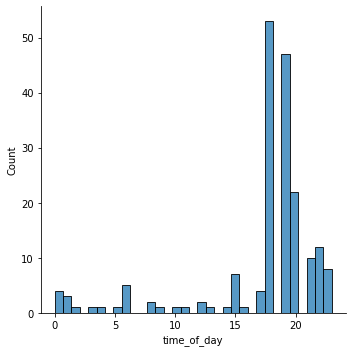

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.displot(scored["time_of_day"])

In [ ]:
scored.to_csv("scored.csv")


(array([ 7., 15., 13., 12.,  2.,  1.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

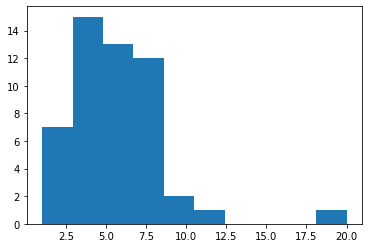

In [ ]:
plt.hist(scored[scored["group"] =="light_mode"]["Diff_found"])


(array([16., 18.,  9.,  1.,  3.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <BarContainer object of 10 artists>)

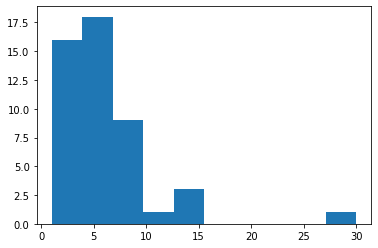

In [ ]:

plt.hist(scored[scored["group"] =="dark_mode"]["Diff_found"])


(array([ 7.,  9., 11.,  5.,  6.,  4.,  1.,  0.,  0.,  1.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

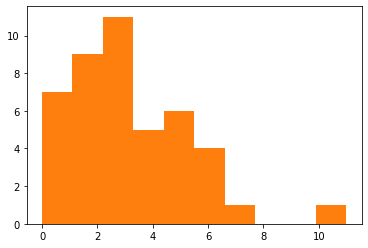

In [ ]:
%matplotlib inline

plt.hist(scored[scored["group"] =="low_contrast"]["Diff_found"]) 
plt.hist(scored[scored["group"] =="low_contrast"]["Diff_found"]) 
#plt.hist(scored[scored["group"] =="neon"]["RC_4"])

In [ ]:
print("There are",len(scored[scored["group"] =="light_mode"])-1,"participants in the light mode group")
print("There are",len(scored[scored["group"] =="dark_mode"])-1,"participants in the dark mode group")
print("There are",len(scored[scored["group"] =="low_contrast"]),"participants in the low contrast group")
print("There are",len(scored[scored["group"] =="neon"]),"participants in the neon group")

There are 50 participants in the light mode group
There are 47 participants in the dark mode group
There are 44 participants in the low contrast group
There are 46 participants in the neon group


In [ ]:
import altair as alt

a = alt.Chart(scored[scored["group"] =="light_mode"]).mark_bar().encode(alt.X("Diff_found:Q", bin=True),y='count()',)
b = alt.Chart(scored[scored["group"] =="dark_mode"]).mark_bar().encode(alt.X("Diff_found:Q", bin=True),y='count()',)
c = alt.Chart(scored[scored["group"] =="low_contrast"]).mark_bar().encode(alt.X("Diff_found:Q", bin=True),y='count()',)
d = alt.Chart(scored[scored["group"] =="neon"]).mark_bar().encode(alt.X("Diff_found:Q", bin=True),y='count()',)
a | b | c | d

alt.HConcatChart(...)

In [ ]:
scored['Score'] = (scored['RC_score'] + scored['Diff_score'] + scored['M_score'] +scored['Pattern_score']) /4

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
scored.to_csv("scored.csv")

In [ ]:
scored

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score,nighttime,Score
0,18,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode,0.50,0.200000,0.1250,0,0.5,1,False,0.206250
2,20,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode,0.00,0.333333,1.0000,1,1.0,1,True,0.583333
5,22,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode,0.00,0.466667,0.8750,1,0.5,1,True,0.585417
6,23,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.50,0.200000,1.0000,0,0.5,1,True,0.425000
7,0,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.25,0.133333,1.0000,0,0.5,1,True,0.345833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,19,2001,Undergraduate Student,0,1,1,1,1,87.546,4,"star, eyes, holes, pencil",1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,neon,0.75,0.266667,0.4375,0,1.0,1,False,0.363542
218,21,2001,Undergraduate Student,0,0,0,0,0,107.229,5,"firework, pencil, circles",1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,1,1,neon,0.00,0.333333,0.3125,1,0.5,1,True,0.411458
219,0,1996,Undergraduate Student,1,1,0,0,1,187.116,7,"tongue,mouth,rocket,coin,surface,eye,mouth",1,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.5625,0,0.5,1,True,0.444792
220,18,2000,Undergraduate Student,1,1,0,0,1,128.364,7,"nose, bellybutton,mouth,dust,tongue,freckles",1,1,1,1,0,0,1,0,1,1,1,1,0,1,1,0,0,1,neon,0.75,0.466667,0.6875,0,0.5,1,False,0.476042


In [ ]:
scored.groupby('group').mean()['Score']

group
dark_mode       0.469748
light_mode      0.493382
low_contrast    0.452746
neon            0.465602
Name: Score, dtype: float64

In [ ]:
all_group_total_score = scored['Score']
all_group_total_score_mean = np.mean(all_group_total_score)
lm_total_score = scored[scored["group"] =="light_mode"]['Score']
lm_total_score_mean = np.mean(lm_total_score)
dm_total_score = scored[scored["group"] =="dark_mode"]['Score']
dm_total_score_mean = np.mean(dm_total_score)
lc_total_score = scored[scored["group"] =="low_contrast"]['Score']
lc_total_score_mean = np.mean(lc_total_score)
neon_total_score = scored[scored["group"] =="neon"]['Score']
neon_total_score_mean = np.mean(neon_total_score)

Text(0, 0.5, 'Count')

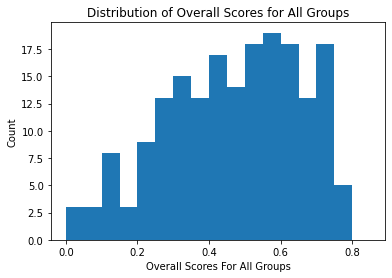

In [ ]:
plt.hist(all_group_total_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Overall Scores for All Groups")
plt.xlabel("Overall Scores For All Groups")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

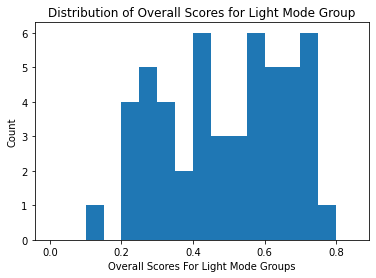

In [ ]:
plt.hist(lm_total_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Overall Scores for Light Mode Group")
plt.xlabel("Overall Scores For Light Mode Groups")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

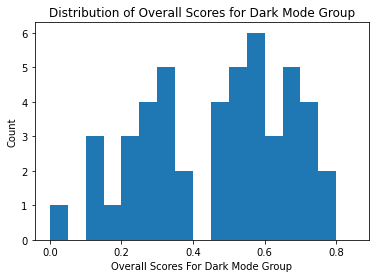

In [ ]:
plt.hist(dm_total_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Overall Scores for Dark Mode Group")
plt.xlabel("Overall Scores For Dark Mode Group")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

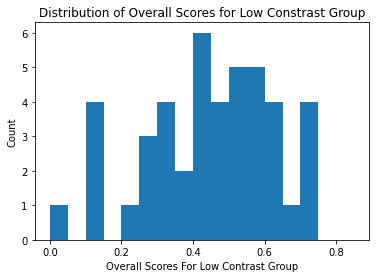

In [ ]:
plt.hist(lc_total_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Overall Scores for Low Constrast Group")
plt.xlabel("Overall Scores For Low Contrast Group")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

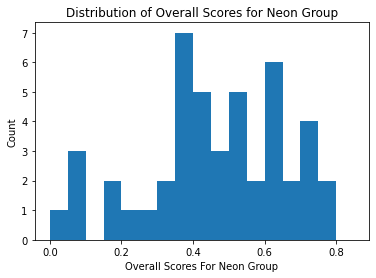

In [ ]:
plt.hist(neon_total_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Overall Scores for Neon Group")
plt.xlabel("Overall Scores For Neon Group")
plt.ylabel("Count")

In [ ]:
all_group_rc_score = scored['RC_score']
all_group_rc_score_mean = np.mean(all_group_total_score)
lm_rc_score = scored[scored["group"] =="light_mode"]['RC_score']
lm_rc_score_mean = np.mean(lm_rc_score)
dm_rc_score = scored[scored["group"] =="dark_mode"]['RC_score']
dm_rc_score_mean = np.mean(dm_rc_score)

Text(0, 0.5, 'Count')

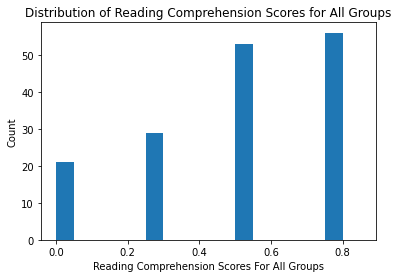

In [ ]:
plt.hist(all_group_rc_score,bins=np.arange(0,.9,.05))
plt.title("Distribution of Reading Comprehension Scores for All Groups")
plt.xlabel("Reading Comprehension Scores For All Groups")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

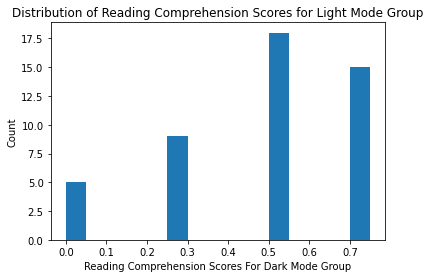

In [ ]:
plt.hist(lm_rc_score,bins=np.arange(0,.8,.05))
plt.title("Distribution of Reading Comprehension Scores for Light Mode Group")
plt.xlabel("Reading Comprehension Scores For Dark Mode Group")
plt.ylabel("Count")

In [ ]:
print(np.mean(scored['Diff_score']))
print(np.mean(scored['Pattern_score']))
print(np.mean(scored['M_score']))
print(np.mean(scored['RC_score']))
print("Average Total:", np.mean(scored['Score']))

print("Liar score is:",np.mean(scored['Liar_score']))


0.3234567901234568
0.48677248677248675
0.5148809523809523
0.5595238095238095
Average Total: 0.47115850970017636
Liar score is: 0.716931216931217


In [ ]:
scored.head()

,time_of_day,dob,student_status,RC_1,RC_2,RC_3,RC_4,RC_5,Diff_timing,Diff_found,Diff_found_list,M_1,M_2,M_3,M_4,M_5,M_6,M_7,M_8,M_9,M_10,M_11,M_12,M_13,M_14,M_15,M_16,Pattern_1,Liar_check,group,RC_score,Diff_score,M_score,Pattern_score,Liar_score,Big_liar_score,nighttime,Score
0,18,NaN,NaN,0,0,1,0,1,185.076,3,"Rod, Circle, Rocket",0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,light_mode,0.50,0.200000,0.125,0,0.5,1,False,0.206250
2,20,1990,Undergraduate Student,0,0,0,1,0,130.31,5,"rocket,pot",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,light_mode,0.00,0.333333,1.000,1,1.0,1,True,0.583333
5,22,1993,Staff,0,0,0,0,0,130.111,7,"eye, sneeze effect , lizard Tung ,rocket,",1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,light_mode,0.00,0.466667,0.875,1,0.5,1,True,0.585417
6,23,1995,Staff,1,0,0,0,1,198.405,3,"animal,pencil,stones",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.50,0.200000,1.000,0,0.5,1,True,0.425000
7,0,1989,Undergraduate Student,1,0,0,0,0,260.224,2,book smile scale,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,light_mode,0.25,0.133333,1.000,0,0.5,1,True,0.345833


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=defd9a39-50df-4c25-8010-31b722a7f0c9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>